In [1]:
import os
cwd = os.getcwd()
datadir =r'G:\My Drive\HyBISCUS_JTI_Data\ECT_Training\ECt_Training_Dataset_04172022\Full_CMOS_04172022'
# reqdir=r'\Documents\GitHub\Measurement\Segmentation'
# os.chdir(reqdir)
# #Check for/install dependencies from github requisites list
# os.popen('pip install -r requirements.txt').readlines()
# os.chdir(datadir)

import numpy as np
from ipywidgets import interact, widgets
from IPython.display import display
from scipy import ndimage as ndi
from skimage import (exposure, feature, filters, io, measure, morphology, restoration, segmentation, transform,util)
import skimage as ski
import pandas as pd
from tqdm import tqdm
import multiprocessing as mp
from joblib import Parallel, delayed
import matplotlib
import matplotlib.pyplot as plt
# %%capture
# %matplotlib inline
matplotlib.rcParams['figure.figsize'] = 24*np.array([.404, 1.518])

imratio=.404/1.518

In [86]:
def improcess(image_list=None,index=None,quality=.25,compress=True):
    imname=r'\tiff_series\ECT_Training_04172022_Region 2_Merged_z{}.tif'.format(str(index))
    image=io.imread(datadir+imname)
    image=ski.exposure.rescale_intensity(image)
    if compress:
        image=ski.transform.rescale(image, quality, anti_aliasing=False)
    image_list.append(image)
    return image_list

def slider(index=None):
    io.imshow(image_list[index])

def yzslicer(array=None,x=1200,y=1200):
    # z , x , y , rbg
    print('Original Array shape ( z , x , y , rbg): ',array.shape)
    slice2D=array[int(100*20/150):int(100*140/150),y:y+int(200/1.518),x,:]
    print('New array shape: ',slice2D.shape)
    return slice2D

# Downsampled image analysis

In [87]:
# im_index=["%.2d" % i for i in range(100)]
# image_list=[]
# for i in tqdm(im_index, desc = 'Reading Frames'):
#     improcess(image_list=image_list,index=i,quality=imratio)
# imarray = np.array(image_list)

Original Array shape ( z , x , y , rbg):  (100, 3128, 1904, 1)
New array shape:  (80, 131, 1)


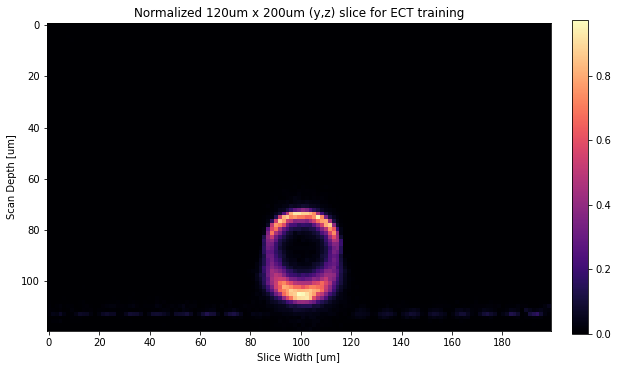

In [112]:
#Input the xy coordinate from full resolution image here.
x=4826;y=5919;
slice2D = yzslicer(imarray,x=int(x*imratio),y=int((y-495//2)*imratio))
plt.yticks(80/6*np.arange(6), list(range(0,120,20)))  # Set text labels.
plt.xticks(131/10*np.arange(10), list(range(0,200,20)))  # Set text labels.
plt.imshow(slice2D,cmap='magma')
plt.ylabel('Scan Depth [um]')
plt.xlabel('Slice Width [um]')
plt.title('Normalized 120um x 200um (y,z) slice for ECT training')
plt.colorbar(fraction=0.029, pad=0.04)
plt.show()

In [113]:
io.imsave(r'C:\Users\joeyi\Desktop\yz_slices\slice_{}_{}.tif'.format(x,y),slice2D)

# Full size image analysis

In [58]:
# im_index=["%.2d" % i for i in range(100)]
# high_res_image_list=[]
# for i in tqdm(im_index, desc = 'Reading Frames'):
#     improcess(image_list=high_res_image_list,index=i,compress=False)
# hires_array=np.array(high_res_image_list)

In [4]:
# hires_slice=yzslicer(hires_array,x=6294,y=4676-495//2)
# plt.imshow(hires_slice)

# Max projection of data

In [86]:
# max_proj = np.max(hires_array, axis=0)
# plt.imshow(max_proj)

In [85]:
# io.imsave(r'C:\Users\joeyi\Desktop\slicemap.png',max_proj)